1. This is the india vix daily tumeframe data
2. Convert the timezone from unix format to normal date time format 
3. Explore the data 
4. Segregate the data on basis on each weekdays
5. See if there is any visible and repetitive pattern in the whole data set 
which can lead us to any pattern where the india_vix is increasing again n again. 
6. Use whatever statistical methods or ML techniques you would like to work with.

In [ ]:
import pandas as pd

data = pd.read_csv("NSE_INDIAVIX, 1D.csv")

In [ ]:
data.head()

,time,open,high,low,close,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Shapes.1,PP SuperTrend,Plot,Buy,Sell,Plot.1,Plot.2,Volume,Volume MA,HV
0,1279856700,18.900000,19.719999,17.139999,19.240000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1280115900,19.240000,20.049999,18.620001,19.969999,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1280202300,19.969999,20.160000,18.959999,19.219999,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1280288700,19.219999,19.809999,17.959999,19.520000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1280375100,19.520000,19.650000,18.330000,18.330000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
data.columns

Index(['time', 'open', 'high', 'low', 'close', 'Unnamed: 5', 'Unnamed: 6',
       'Unnamed: 7', 'Unnamed: 8', 'Unnamed: 9', 'Unnamed: 10', 'Unnamed: 11',
       'Unnamed: 12', 'Unnamed: 13', 'Unnamed: 14', 'Unnamed: 15',
       'Unnamed: 16', 'Unnamed: 17', 'Unnamed: 18', 'Unnamed: 19',
       'Unnamed: 20', 'Unnamed: 21', 'Unnamed: 22', 'Unnamed: 23',
       'Unnamed: 24', 'Unnamed: 25', 'Unnamed: 26', 'Unnamed: 27', 'Chars',
       'Chars.1', 'Shapes', 'Shapes.1', 'PP SuperTrend', 'Plot', 'Buy', 'Sell',
       'Plot.1', 'Plot.2', 'Volume', 'Volume MA', 'HV'],
      dtype='object')

In [ ]:
data = data[['time', 'open', 'high', 'low', 'close']]

In [ ]:
data.head()

,time,open,high,low,close
0,1279856700,18.900000,19.719999,17.139999,19.240000
1,1280115900,19.240000,20.049999,18.620001,19.969999
2,1280202300,19.969999,20.160000,18.959999,19.219999
3,1280288700,19.219999,19.809999,17.959999,19.520000
4,1280375100,19.520000,19.650000,18.330000,18.330000


In [ ]:
to_datetime = lambda x: pd.to_datetime(x, unit='s')
data['time'] = data['time'].apply(to_datetime)

In [ ]:
data.head()

,time,open,high,low,close
0,2010-07-23 03:45:00,18.900000,19.719999,17.139999,19.240000
1,2010-07-26 03:45:00,19.240000,20.049999,18.620001,19.969999
2,2010-07-27 03:45:00,19.969999,20.160000,18.959999,19.219999
3,2010-07-28 03:45:00,19.219999,19.809999,17.959999,19.520000
4,2010-07-29 03:45:00,19.520000,19.650000,18.330000,18.330000


In [ ]:

int(data["time"].iloc[0].strftime("%d"))


23

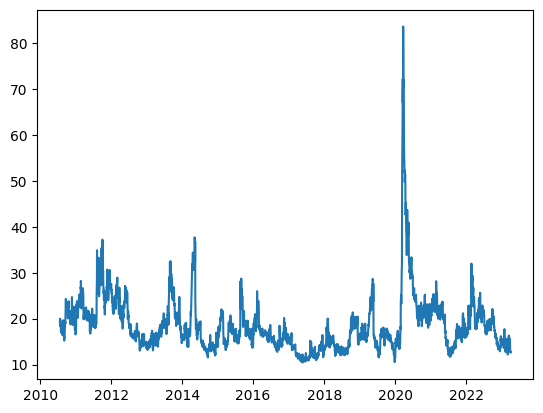

In [ ]:
import matplotlib.pyplot as plt

plt.plot(data["time"],data["close"])

In [ ]:
data = pd.read_csv("NSE_INDIAVIX, 1D.csv", parse_dates=True)
data = data[['time', 'open', 'close']]   
data["spread"] = data["close"] - data["open"]
#data = data.drop(["close","open"],axis=1)
to_datetime = lambda x: pd.to_datetime(x, unit='s')
data['time'] = data['time'].apply(to_datetime)
data['year'] = pd.DatetimeIndex(data['time']).year
data['month'] = pd.DatetimeIndex(data['time']).month
data['day'] = pd.DatetimeIndex(data['time']).day
data["weekday"] = pd.DatetimeIndex(data['time']).day % 7 + 1

In [ ]:
data.to_csv('my_data.csv', index=False)
data.head()

,time,open,close,spread,year,month,day,weekday
0,2010-07-23 03:45:00,18.900000,19.240000,0.340000,2010,7,23,3
1,2010-07-26 03:45:00,19.240000,19.969999,0.729999,2010,7,26,6
2,2010-07-27 03:45:00,19.969999,19.219999,-0.750000,2010,7,27,7
3,2010-07-28 03:45:00,19.219999,19.520000,0.300001,2010,7,28,1
4,2010-07-29 03:45:00,19.520000,18.330000,-1.190000,2010,7,29,2


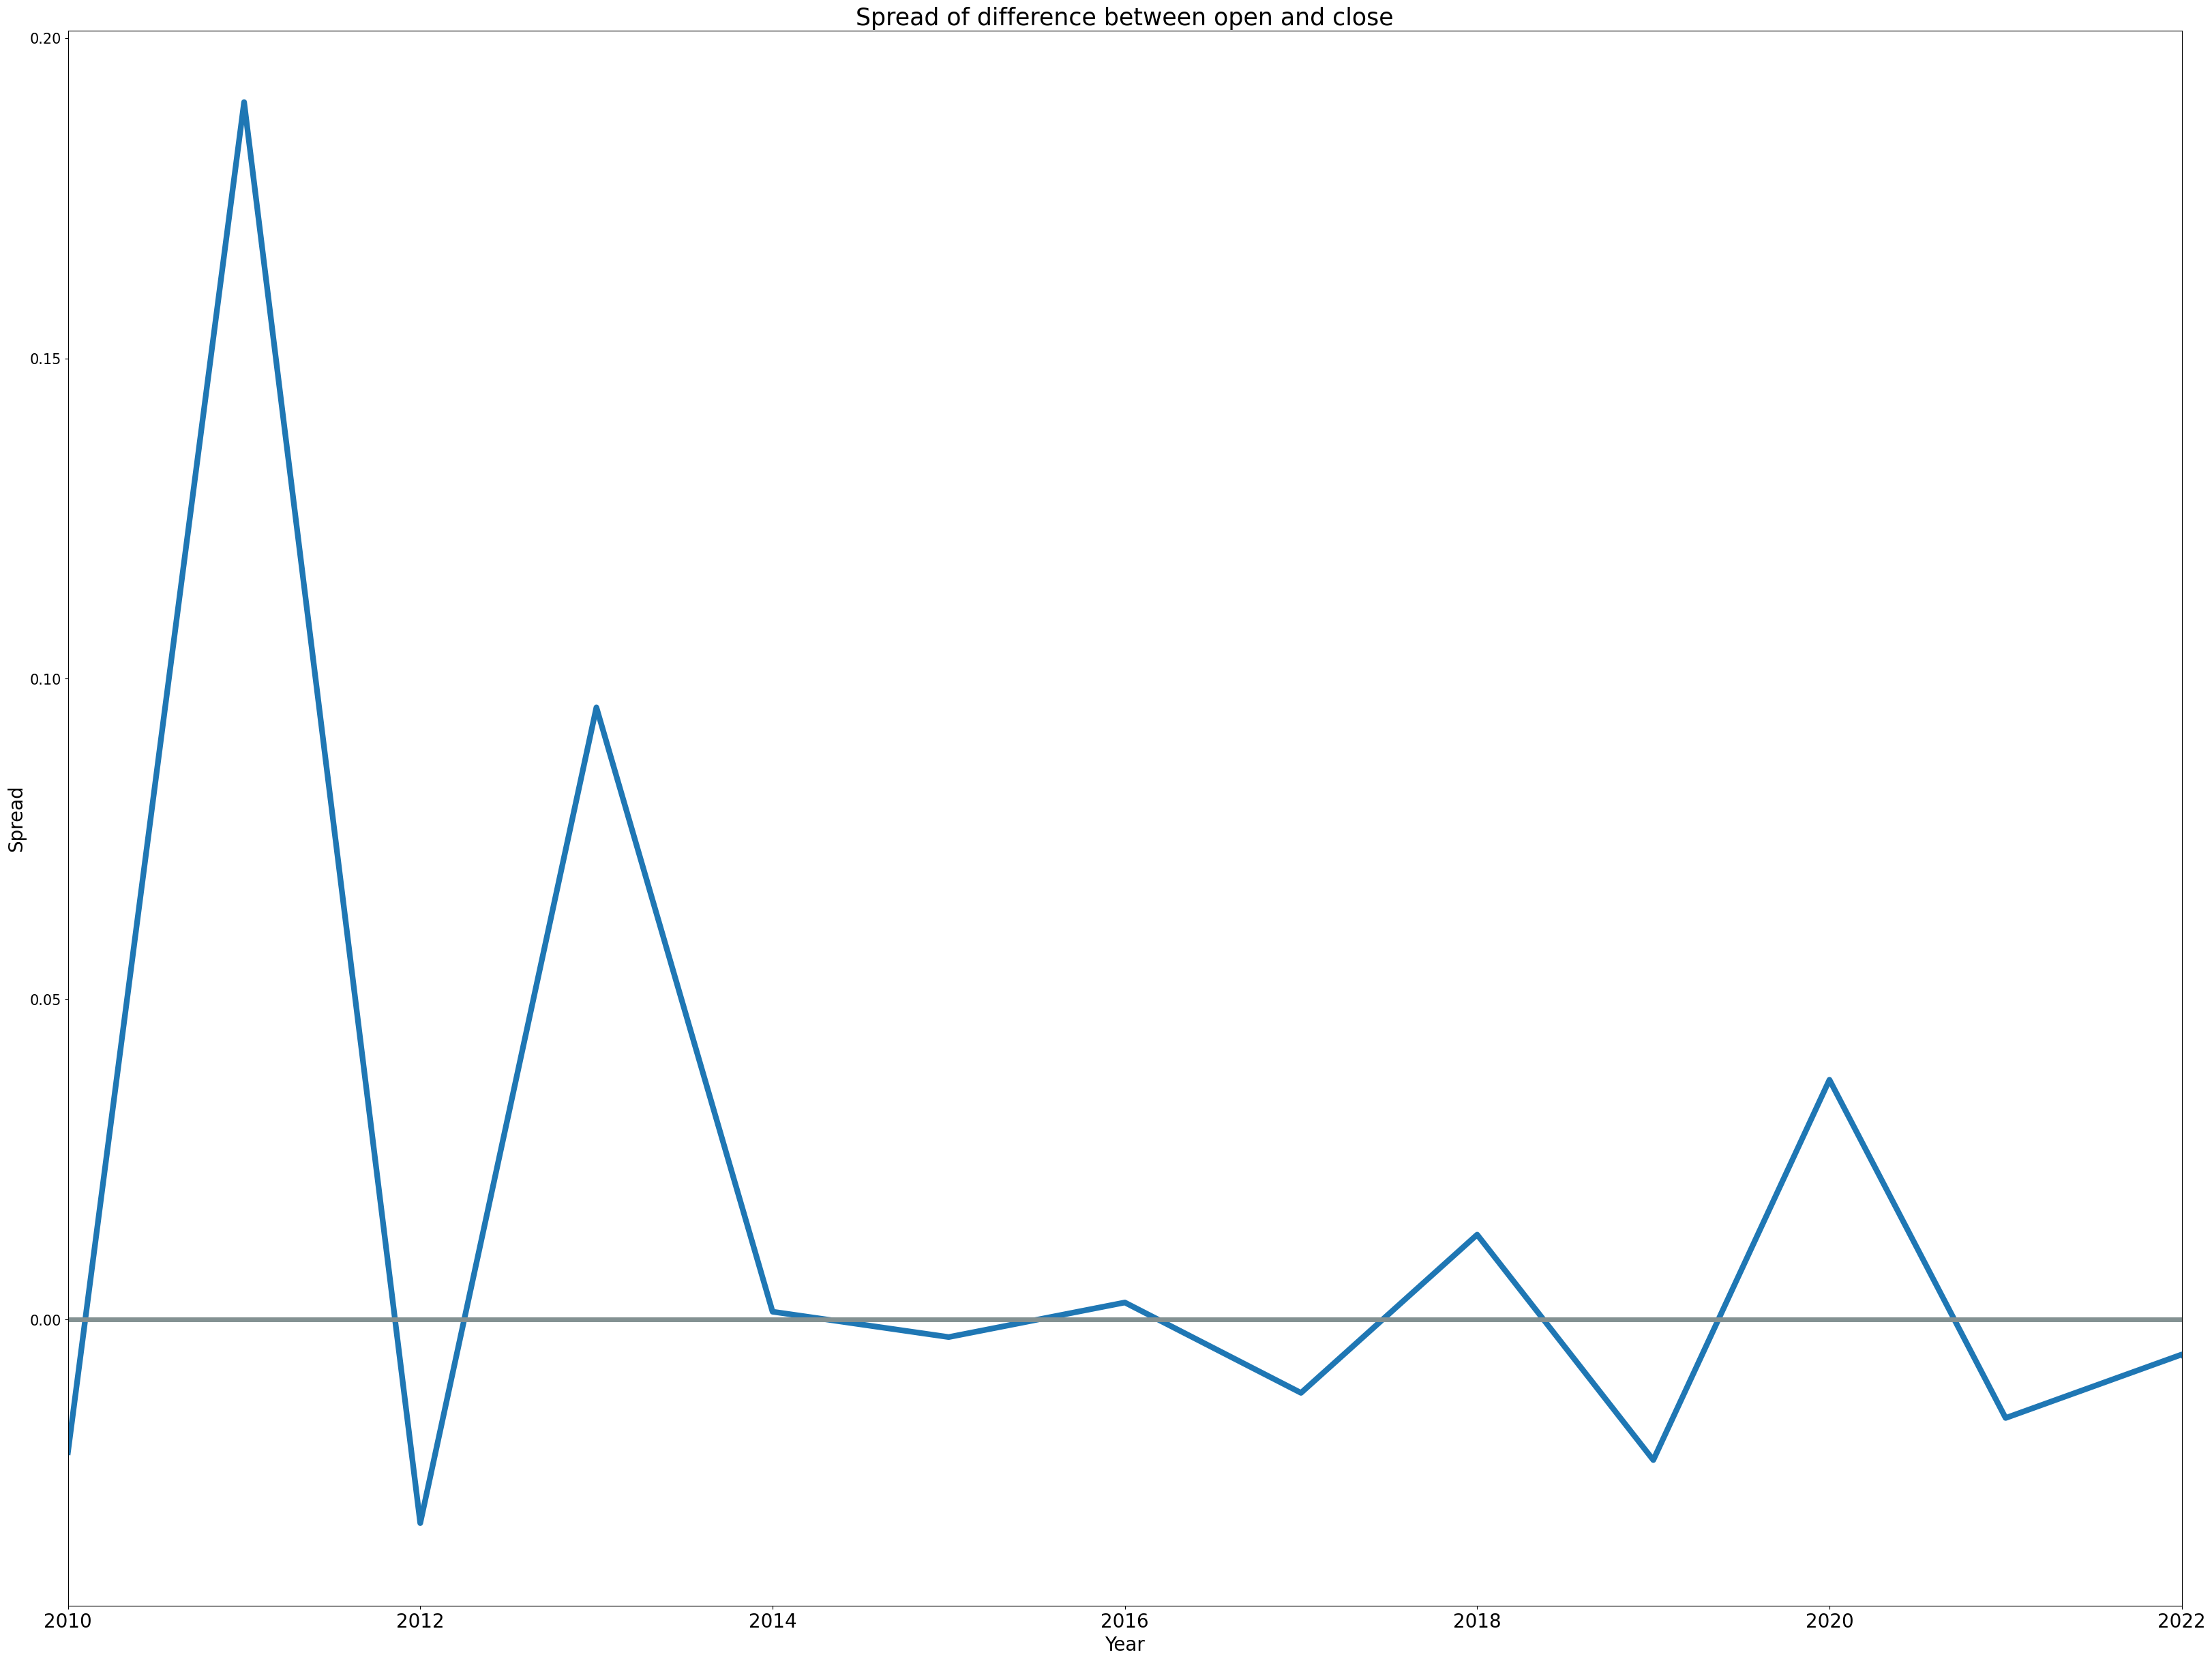

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(40,30))

ax3 = sns.lineplot(x = 'year', y = 'spread', data = data, lw = 6, err_style=None, estimator='mean')
plt.plot([2010, 2022], [0, 0], color = '#839192', lw = 5)
plt.title('Spread of difference between open and close', fontsize = 25)
plt.xlabel('Year', fontsize = 20)
plt.ylabel('Spread', fontsize = 20)
ax3.set_xlim(2010, 2022)
plt.xticks(fontsize = 20)
plt.yticks(fontsize = 15)
plt.show() 

In [ ]:
!pip install pyod

In [ ]:
from pyod.models.knn import KNN
from pyod.models.lof import LOF
import scipy as sp


data_1 = pd.read_csv("my_data.csv", index_col='time', parse_dates=True)
   

data_1 = data_1.drop(['open',	'spread',	'year',	'month',	'day',	'weekday'], axis=1)
k=4
knn = KNN(algorithm='auto', contamination=0.05, leaf_size=30, method='mean',

    metric='minkowski', metric_params=None, n_jobs=1, n_neighbors=k, p=2,

    radius=1.0)
knn.fit(data_1)


predicted = pd.Series(knn.predict(data_1),index=data_1.index)

print("No. of neighbour")
print(k)
  
print("Number of outliers")
print(predicted.sum())

outliers = predicted[predicted == 1]
outliers = data_1.loc[outliers.index]

No. of neighbour
4
Number of outliers
100


In [ ]:
print(outliers)

                         close
time                          
2011-08-09 03:45:00  34.880001
2011-08-10 03:45:00  28.950001
2011-08-26 03:45:00  33.259998
2011-09-12 03:45:00  32.750000
2011-09-13 03:45:00  32.770000
...                        ...
2020-06-16 03:45:00  32.965000
2020-06-17 03:45:00  33.355000
2020-06-18 03:45:00  31.455000
2020-06-19 03:45:00  29.965000
2020-06-22 03:45:00  30.459999

[100 rows x 1 columns]


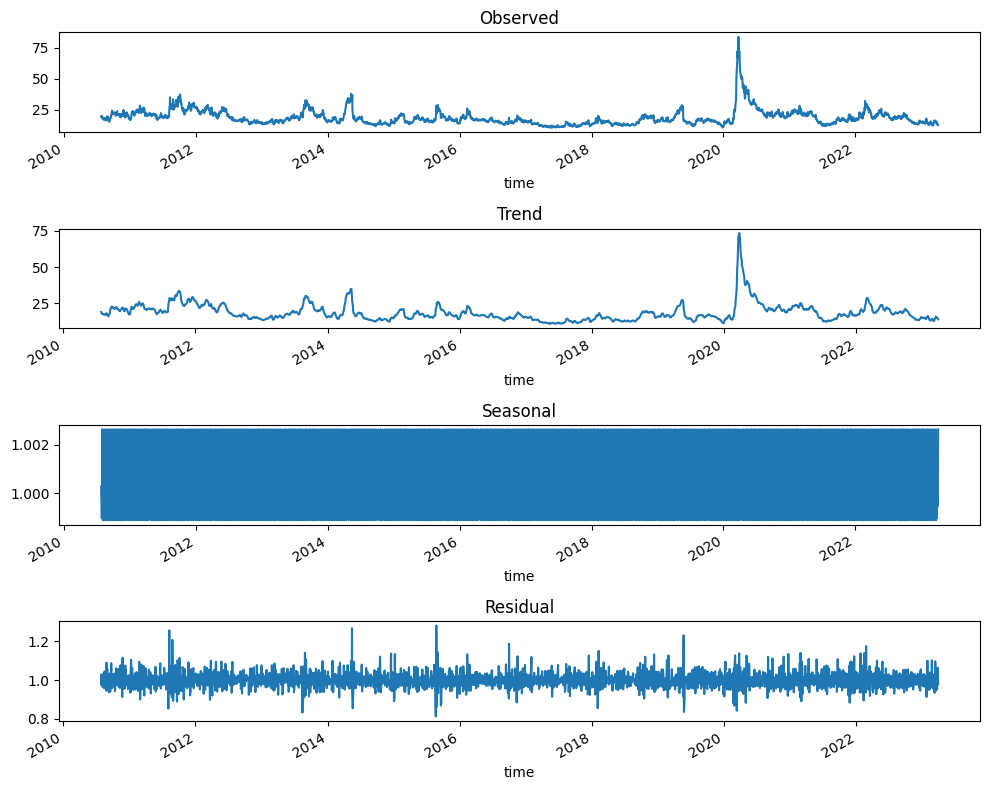

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose

df = pd.read_csv('my_data.csv', index_col='time', parse_dates=True)

decomposition = seasonal_decompose(data_1, model='multiplicative', period=7)

fig, ax = plt.subplots(4, 1, figsize=(10, 8))
decomposition.observed.plot(ax=ax[0], title='Observed')
decomposition.trend.plot(ax=ax[1], title='Trend')
decomposition.seasonal.plot(ax=ax[2], title='Seasonal')
decomposition.resid.plot(ax=ax[3], title='Residual')
plt.tight_layout()
plt.show()

 Realized volatility is the square root of realized variance, which is the sum of squared return. Realized volatility is used to calculate the performance of the volatility prediction method

In [ ]:
!pip install arch

In [ ]:
import numpy as np
from scipy.stats import norm
import scipy.optimize as opt
import yfinance as yf
import pandas as pd
import datetime
import time
from arch import arch_model
import matplotlib.pyplot as plt
from numba import jit
from sklearn.metrics import mean_squared_error as mse
import warnings
warnings.filterwarnings('ignore')    

In [ ]:

        
s_p500 = yf.download(stocks, start=start, end = end, interval='1d')
    

In [ ]:
ret = 100 * (df.pct_change()[1:]['close'])
realized_vol = ret.rolling(5).std()

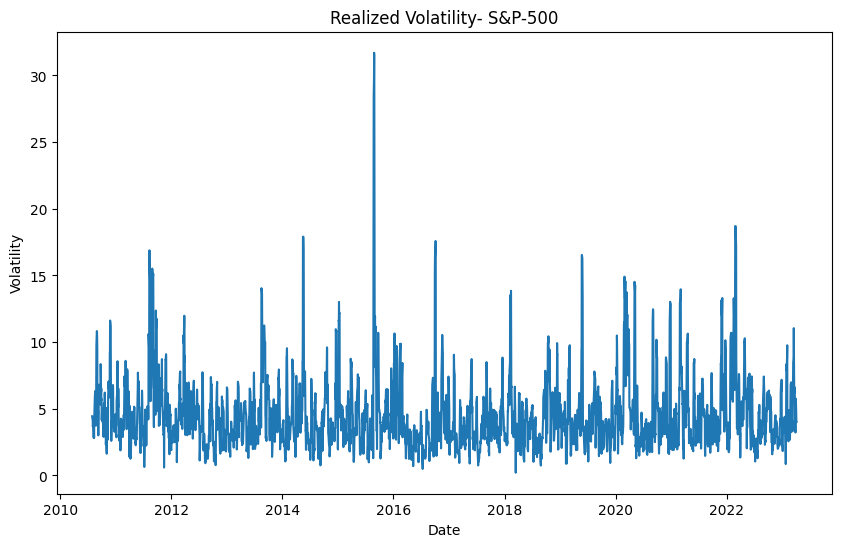

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(realized_vol.index,realized_vol)
plt.title('Realized Volatility- S&P-500')
plt.ylabel('Volatility')
plt.xlabel('Date')
plt.show()

In [ ]:
retv = ret.values 

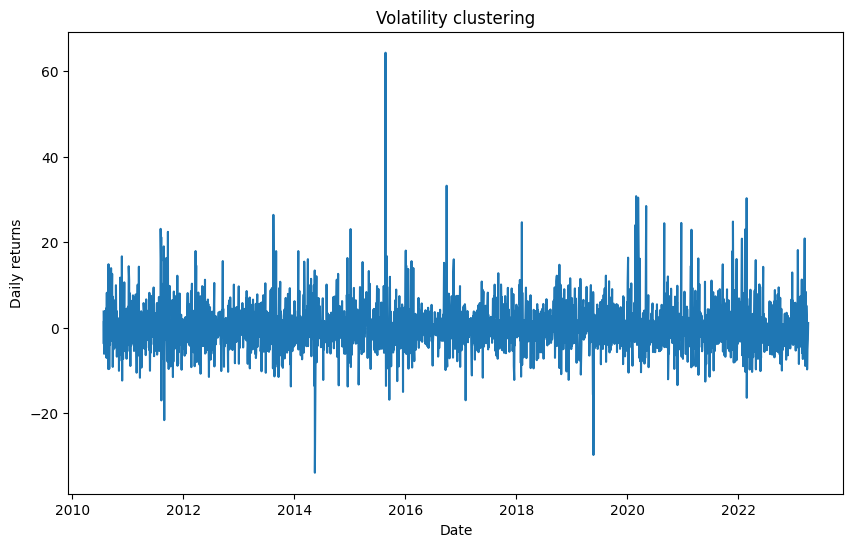

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(df.index[1:], ret)
plt.title('Volatility clustering')
plt.ylabel('Daily returns')
plt.xlabel('Date')
plt.show()

In [ ]:
arch = arch_model(ret, mean='zero', vol='ARCH', p=1).fit(disp='off')
print(arch.summary())

                        Zero Mean - ARCH Model Results                        
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -9667.01
Distribution:                  Normal   AIC:                           19338.0
Method:            Maximum Likelihood   BIC:                           19350.1
                                        No. Observations:                 3141
Date:                Thu, Apr 06 2023   Df Residuals:                     3141
Time:                        12:59:47   Df Model:                            0
                             Volatility Model                             
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
omega         25.1942      2.184     11.533  8.968e-31   [ 20.91

In [ ]:
n = 252
split_date = ret.iloc[-n:].index
bic_arch = []
best_param=0
for p in range(1, 5): 
          arch = arch_model(ret, mean='zero', vol='ARCH', p=p).fit(disp='off')
          bic_arch.append(arch.bic)
          if arch.bic == np.min(bic_arch): 
              best_param = p
arch = arch_model(ret, mean='zero', vol='ARCH', p=best_param).fit(disp='off') 
print(arch.summary())
forecast = arch.forecast(start=split_date[0]) 
forecast_arch = forecast

                        Zero Mean - ARCH Model Results                        
Dep. Variable:                  close   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -9633.12
Distribution:                  Normal   AIC:                           19274.2
Method:            Maximum Likelihood   BIC:                           19298.5
                                        No. Observations:                 3141
Date:                Thu, Apr 06 2023   Df Residuals:                     3141
Time:                        13:04:03   Df Model:                            0
                              Volatility Model                             
                 coef    std err          t      P>|t|     95.0% Conf. Int.
---------------------------------------------------------------------------
omega         21.6007      2.813      7.680  1.593e-14    [ 1

In [ ]:
rmse_arch = np.sqrt(mse(realized_vol[-n:] / 100, np.sqrt(forecast_arch.variance.iloc[-len(split_date):] /100))) 
print('The RMSE value of ARCH model is {:.4f}'.format(rmse_arch))
        

The RMSE value of ARCH model is 0.4755


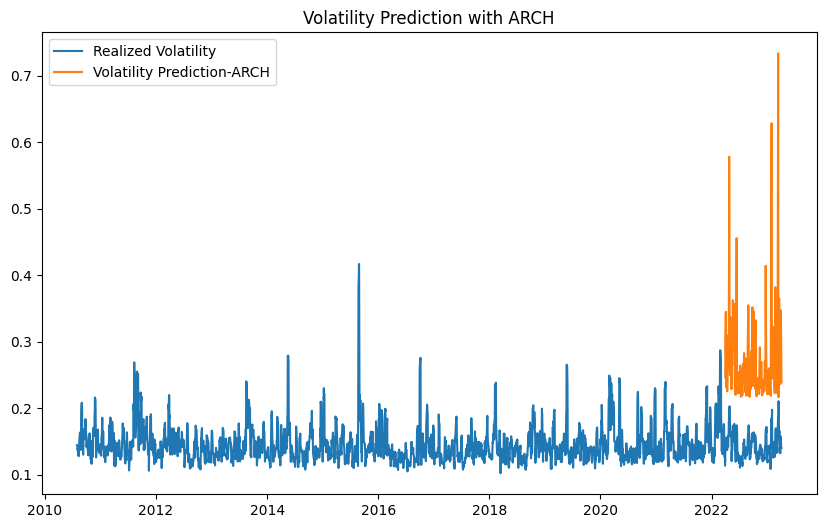

In [ ]:
plt.figure(figsize=(10, 6))
plt.plot(realized_vol / 100 - 0.3, label='Realized Volatility')
plt.plot(forecast_arch.variance.iloc[-len(split_date):] / 100,
label='Volatility Prediction-ARCH')
plt.title('Volatility Prediction with ARCH', fontsize=12)
plt.legend()
plt.show()